## Importing necessary libraries:

In [408]:
## Other
import os
import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

## Data Preparation Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


##Model Library
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier
from catboost import CatBoostClassifier
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score,accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report,f1_score
from sklearn.ensemble import StackingClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



## Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Reading the dataset:

In [261]:
ch_train = pd.read_csv('Train.csv')

In [262]:
ch_train.drop_duplicates(inplace=True)

In [263]:
ch_train.shape

(33908, 17)

In [264]:
ch_test = pd.read_csv('Test.csv')

In [265]:
pd.DataFrame(ch_train['labels'].value_counts(normalize=True).mul(100).round(0).astype(str) + '%')

,labels
0,88.0%
1,12.0%


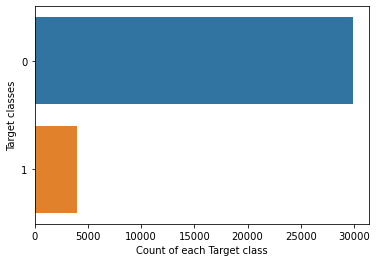

In [266]:
sns.countplot(y=ch_train.labels ,data=ch_train)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

##  RandomOverSampler to handle imbalanced data

In [267]:
from imblearn.combine import SMOTETomek

In [268]:
x = ch_train.drop(columns=['labels'])

In [269]:
y = ch_train['labels']

# Implementing Oversampling for Handling Imbalanced 

In [270]:
smk = SMOTETomek(random_state=42)
x_smk,y_smk=smk.fit_sample(x,y)

In [271]:
x_smk

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59771,-1.200817,-0.350038,0.983786,2.324179,-0.364119,-0.411453,-0.251940,9,1,1,0,1,0,0,5,3
59772,-0.669743,0.246676,-0.584874,0.108879,-0.246560,0.859150,0.871511,4,1,2,0,0,0,0,3,0
59773,-1.025920,3.403820,-1.331747,-0.242675,-0.466309,0.220863,0.043611,4,2,2,0,0,0,0,3,2
59774,1.861994,0.676896,0.816074,-0.013880,-0.246560,0.918139,1.050473,4,0,0,0,0,0,1,10,2


In [272]:
y_smk.shape

(59776,)

In [273]:
pd.DataFrame(y_smk.value_counts(normalize=True).mul(100).round(0).astype(str) + '%')

,labels
1,50.0%
0,50.0%


## To Find Optimal Threshold For Binary Classification

In [274]:
x_train,x_test,y_train,y_test = train_test_split(x_smk, y_smk, test_size=0.3, random_state=1)

#### Logistic Regression

In [275]:
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### KNeighborsClassifier

In [276]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### AdaBoostClassifier

In [277]:
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

#### RandomForestClassifier

In [278]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [279]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.979182346965569


In [280]:
final_prediction

0        0.830010
1        0.503962
2        0.124457
3        0.159326
4        0.708901
           ...   
17928    0.318959
17929    0.127842
17930    0.132167
17931    0.695302
17932    0.870870
Length: 17933, dtype: float64

#### Calculate the ROc Curve

In [281]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.88518617, 0.88518617, 0.86590069, ..., 0.17118531, 0.17118405,
       0.11328129])

In [282]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1176,0.578084,0.934478
1238,0.560849,0.934478
1237,0.561078,0.934478
1235,0.561553,0.934423
1234,0.561948,0.934423


In [283]:
THRESHOLD_VALUE = 0.56

## Model Building:

In [284]:
def model_fit(alg,train_X,train_Y,test_data,algName):
    x_train,x_test,y_train,y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=1)
    #Fit the algorithm on the data
    alg.fit(x_train,y_train)
    
    ### Predict training set:
    dtrain_predictions  = alg.predict(x_train);
    ## dtrain_predictions = np.where(dtrain_predictions[:,1]>THRESHOLD_VALUE,1,0)
    train_accuracy=f1_score(y_train,dtrain_predictions)
    print(" Train Prediction  f1_score :",train_accuracy)
    print(classification_report(y_train,dtrain_predictions))
    
    ### Predict test set:
    dtest_predictions = alg.predict(x_test)
    ## dtest_predictions = np.where(dtest_predictions[:,1]>THRESHOLD_VALUE,1,0)
    test_accuracy=accuracy_score(y_test,dtest_predictions)
    print(" Test Prediction Accuracy :",test_accuracy)
    print(classification_report(y_test,dtest_predictions))

    final_predictions  = alg.predict(test_data);
    result = pd.DataFrame(final_predictions,columns= ["labels"])
    result.to_excel(algName+'.xlsx',index=False)
    

In [285]:
##std = MinMaxScaler()
##X_std = std.fit_transform(x_smk)

## Logistic Regression

In [286]:
logistic=LogisticRegression()
model_fit(logistic,x_smk, y_smk,ch_test,'logistic_submission')

 Train Prediction  f1_score : 0.8378448174668388
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     20870
           1       0.83      0.85      0.84     20973

    accuracy                           0.83     41843
   macro avg       0.84      0.83      0.83     41843
weighted avg       0.84      0.83      0.83     41843

 Test Prediction Accuracy : 0.8390118775441923
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      9018
           1       0.82      0.86      0.84      8915

    accuracy                           0.84     17933
   macro avg       0.84      0.84      0.84     17933
weighted avg       0.84      0.84      0.84     17933



## Ridge Regression

In [287]:
lasso = LogisticRegression(penalty='l2')
model_fit(lasso,x_smk, y_smk,ch_test,'ridge_submission')

 Train Prediction  f1_score : 0.8378448174668388
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     20870
           1       0.83      0.85      0.84     20973

    accuracy                           0.83     41843
   macro avg       0.84      0.83      0.83     41843
weighted avg       0.84      0.83      0.83     41843

 Test Prediction Accuracy : 0.8390118775441923
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      9018
           1       0.82      0.86      0.84      8915

    accuracy                           0.84     17933
   macro avg       0.84      0.84      0.84     17933
weighted avg       0.84      0.84      0.84     17933



## Elastic Net

In [288]:
elasticnet = SGDClassifier(loss='log')
model_fit(elasticnet,x_smk, y_smk,ch_test,'elasticnet_submission')

 Train Prediction  f1_score : 0.8400603291087951
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     20870
           1       0.80      0.89      0.84     20973

    accuracy                           0.83     41843
   macro avg       0.83      0.83      0.83     41843
weighted avg       0.83      0.83      0.83     41843

 Test Prediction Accuracy : 0.8328779345340992
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      9018
           1       0.79      0.90      0.84      8915

    accuracy                           0.83     17933
   macro avg       0.84      0.83      0.83     17933
weighted avg       0.84      0.83      0.83     17933



## KNN

In [289]:
knn = KNeighborsClassifier()
model_fit(knn,x_smk, y_smk,ch_test,'knn_submission')

 Train Prediction  f1_score : 0.9386604101337784
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     20870
           1       0.89      0.99      0.94     20973

    accuracy                           0.94     41843
   macro avg       0.94      0.93      0.93     41843
weighted avg       0.94      0.94      0.93     41843

 Test Prediction Accuracy : 0.9122846149556684
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      9018
           1       0.86      0.98      0.92      8915

    accuracy                           0.91     17933
   macro avg       0.92      0.91      0.91     17933
weighted avg       0.92      0.91      0.91     17933



## DecisionTreeClassifier

In [290]:
decision=DecisionTreeClassifier()
model_fit(decision,x_smk, y_smk,ch_test,'decision_submission')

 Train Prediction  f1_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20870
           1       1.00      1.00      1.00     20973

    accuracy                           1.00     41843
   macro avg       1.00      1.00      1.00     41843
weighted avg       1.00      1.00      1.00     41843

 Test Prediction Accuracy : 0.8960575475380583
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      9018
           1       0.89      0.90      0.90      8915

    accuracy                           0.90     17933
   macro avg       0.90      0.90      0.90     17933
weighted avg       0.90      0.90      0.90     17933



## Decision Tree - Pruning and Pruning Parameters To avoid Overfitting

In [291]:
## Hyper Parameter Optimization
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
 "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
 "max_leaf_nodes":[None,10,20,30,40,50,60,70],
 "criterion" : ["gini", "entropy"]    
}

In [292]:
dtree=DecisionTreeClassifier()

In [293]:
random_search=RandomizedSearchCV(dtree,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [92]:
##random_search.fit(x_smk,y_smk)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [93]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

In [294]:
decision=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')
model_fit(decision,x_smk, y_smk,ch_test,'decision_hovf_submission')

 Train Prediction  f1_score : 0.812184301840383
              precision    recall  f1-score   support

           0       0.86      0.71      0.78     20870
           1       0.75      0.88      0.81     20973

    accuracy                           0.80     41843
   macro avg       0.80      0.80      0.79     41843
weighted avg       0.80      0.80      0.79     41843

 Test Prediction Accuracy : 0.7956281715273518
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      9018
           1       0.75      0.88      0.81      8915

    accuracy                           0.80     17933
   macro avg       0.81      0.80      0.79     17933
weighted avg       0.81      0.80      0.79     17933



## Random Forest

In [327]:
random=RandomForestClassifier()
model_fit(random,x_smk, y_smk,ch_test,'random_submission')

 Train Prediction  f1_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20870
           1       1.00      1.00      1.00     20973

    accuracy                           1.00     41843
   macro avg       1.00      1.00      1.00     41843
weighted avg       1.00      1.00      1.00     41843

 Test Prediction Accuracy : 0.9383259911894273
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      9018
           1       0.92      0.96      0.94      8915

    accuracy                           0.94     17933
   macro avg       0.94      0.94      0.94     17933
weighted avg       0.94      0.94      0.94     17933



In [296]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_features =["auto","sqrt","log2"]
min_samples_leaf = [10,50,100,200,500]

In [297]:
# Create the random grid
random_grid = {
               'criterion': criterion,
               'max_depth': max_depth,
               'max_features': max_features,
              'min_samples_leaf':min_samples_leaf
            }

In [298]:
random=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_fit(random,x_smk, y_smk,ch_test,'random_submission')

 Train Prediction  f1_score : 0.9541057157545451
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     20870
           1       0.94      0.97      0.95     20973

    accuracy                           0.95     41843
   macro avg       0.95      0.95      0.95     41843
weighted avg       0.95      0.95      0.95     41843

 Test Prediction Accuracy : 0.9213182401159873
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      9018
           1       0.90      0.95      0.92      8915

    accuracy                           0.92     17933
   macro avg       0.92      0.92      0.92     17933
weighted avg       0.92      0.92      0.92     17933



## AdaBoosting Classifier

In [394]:
ada=AdaBoostClassifier()
model_fit(ada,x_smk, y_smk,ch_test,'ada_submission')

 Train Prediction  f1_score : 0.8797934398010903
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20870
           1       0.88      0.88      0.88     20973

    accuracy                           0.88     41843
   macro avg       0.88      0.88      0.88     41843
weighted avg       0.88      0.88      0.88     41843

 Test Prediction Accuracy : 0.8836781352813249
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9018
           1       0.88      0.88      0.88      8915

    accuracy                           0.88     17933
   macro avg       0.88      0.88      0.88     17933
weighted avg       0.88      0.88      0.88     17933



## XGBClassifier

In [395]:
xgb=XGBClassifier()
model_fit(xgb,x_smk, y_smk,ch_test,'xgb_submission')

 Train Prediction  f1_score : 0.9067057427953387
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     20870
           1       0.89      0.93      0.91     20973

    accuracy                           0.90     41843
   macro avg       0.91      0.90      0.90     41843
weighted avg       0.91      0.90      0.90     41843

 Test Prediction Accuracy : 0.9043104890425473
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      9018
           1       0.88      0.93      0.91      8915

    accuracy                           0.90     17933
   macro avg       0.91      0.90      0.90     17933
weighted avg       0.91      0.90      0.90     17933



## Gradient Boosting

In [396]:
gd=GradientBoostingClassifier()
model_fit(gd,x_smk, y_smk,ch_test,'gd_submission')

 Train Prediction  f1_score : 0.9076430889942321
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     20870
           1       0.89      0.93      0.91     20973

    accuracy                           0.91     41843
   macro avg       0.91      0.91      0.91     41843
weighted avg       0.91      0.91      0.91     41843

 Test Prediction Accuracy : 0.9036970947415379
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      9018
           1       0.88      0.93      0.91      8915

    accuracy                           0.90     17933
   macro avg       0.90      0.90      0.90     17933
weighted avg       0.90      0.90      0.90     17933



## LGBMClassifier

In [415]:
lgb = LGBMClassifier()
model_fit(lgb,x_smk, y_smk,ch_test,'lgb_submission')

 Train Prediction  f1_score : 0.9492168960607499
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     20870
           1       0.94      0.95      0.95     20973

    accuracy                           0.95     41843
   macro avg       0.95      0.95      0.95     41843
weighted avg       0.95      0.95      0.95     41843

 Test Prediction Accuracy : 0.941114147103106
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9018
           1       0.94      0.95      0.94      8915

    accuracy                           0.94     17933
   macro avg       0.94      0.94      0.94     17933
weighted avg       0.94      0.94      0.94     17933



## Cat Boot Classifier

In [303]:
cat = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [304]:
cate_features_index = np.where(x.dtypes != float)[0]
x_train,x_test,y_train,y_test = train_test_split(x_smk, y_smk, test_size=0.3, random_state=1)
cat.fit(x_train,y_train,cat_features=cate_features_index,eval_set=(x_test,y_test))

Learning rate set to 0.079698
0:	learn: 0.8223120	test: 0.8228963	best: 0.8228963 (0)	total: 177ms	remaining: 2m 56s
1:	learn: 0.8425065	test: 0.8428038	best: 0.8428038 (1)	total: 308ms	remaining: 2m 33s
2:	learn: 0.8524245	test: 0.8515028	best: 0.8515028 (2)	total: 442ms	remaining: 2m 26s
3:	learn: 0.8530459	test: 0.8535103	best: 0.8535103 (3)	total: 552ms	remaining: 2m 17s
4:	learn: 0.8582320	test: 0.8576925	best: 0.8576925 (4)	total: 680ms	remaining: 2m 15s
5:	learn: 0.8585665	test: 0.8588078	best: 0.8588078 (5)	total: 781ms	remaining: 2m 9s
6:	learn: 0.8593313	test: 0.8591424	best: 0.8591424 (6)	total: 886ms	remaining: 2m 5s
7:	learn: 0.8724757	test: 0.8715218	best: 0.8715218 (7)	total: 1s	remaining: 2m 4s
8:	learn: 0.8738618	test: 0.8736408	best: 0.8736408 (8)	total: 1.13s	remaining: 2m 4s
9:	learn: 0.8752957	test: 0.8736965	best: 0.8736965 (9)	total: 1.24s	remaining: 2m 2s
10:	learn: 0.8770165	test: 0.8753137	best: 0.8753137 (10)	total: 1.35s	remaining: 2m 1s
11:	learn: 0.8788328

93:	learn: 0.9201539	test: 0.9200357	best: 0.9200357 (93)	total: 10.6s	remaining: 1m 42s
94:	learn: 0.9205841	test: 0.9201472	best: 0.9201472 (94)	total: 10.7s	remaining: 1m 42s
95:	learn: 0.9208948	test: 0.9199799	best: 0.9201472 (94)	total: 10.8s	remaining: 1m 41s
96:	learn: 0.9207514	test: 0.9200915	best: 0.9201472 (94)	total: 10.9s	remaining: 1m 41s
97:	learn: 0.9208948	test: 0.9204260	best: 0.9204260 (97)	total: 11s	remaining: 1m 41s
98:	learn: 0.9211338	test: 0.9203703	best: 0.9204260 (97)	total: 11.1s	remaining: 1m 41s
99:	learn: 0.9211816	test: 0.9203703	best: 0.9204260 (97)	total: 11.2s	remaining: 1m 40s
100:	learn: 0.9212533	test: 0.9204818	best: 0.9204818 (100)	total: 11.3s	remaining: 1m 40s
101:	learn: 0.9215161	test: 0.9207048	best: 0.9207048 (101)	total: 11.4s	remaining: 1m 40s
102:	learn: 0.9213966	test: 0.9209279	best: 0.9209279 (102)	total: 11.5s	remaining: 1m 40s
103:	learn: 0.9215400	test: 0.9213740	best: 0.9213740 (103)	total: 11.6s	remaining: 1m 40s
104:	learn: 0.9

185:	learn: 0.9401573	test: 0.9350917	best: 0.9352033 (181)	total: 21.4s	remaining: 1m 33s
186:	learn: 0.9403962	test: 0.9352590	best: 0.9352590 (186)	total: 21.5s	remaining: 1m 33s
187:	learn: 0.9405396	test: 0.9353148	best: 0.9353148 (187)	total: 21.6s	remaining: 1m 33s
188:	learn: 0.9406830	test: 0.9351475	best: 0.9353148 (187)	total: 21.7s	remaining: 1m 33s
189:	learn: 0.9409459	test: 0.9354821	best: 0.9354821 (189)	total: 21.9s	remaining: 1m 33s
190:	learn: 0.9409698	test: 0.9357051	best: 0.9357051 (190)	total: 22s	remaining: 1m 33s
191:	learn: 0.9412327	test: 0.9357609	best: 0.9357609 (191)	total: 22.1s	remaining: 1m 32s
192:	learn: 0.9412805	test: 0.9358167	best: 0.9358167 (192)	total: 22.2s	remaining: 1m 32s
193:	learn: 0.9419258	test: 0.9358724	best: 0.9358724 (193)	total: 22.3s	remaining: 1m 32s
194:	learn: 0.9417824	test: 0.9358724	best: 0.9358724 (193)	total: 22.4s	remaining: 1m 32s
195:	learn: 0.9417585	test: 0.9357051	best: 0.9358724 (193)	total: 22.6s	remaining: 1m 32s
1

277:	learn: 0.9488325	test: 0.9409469	best: 0.9409469 (277)	total: 32s	remaining: 1m 23s
278:	learn: 0.9490715	test: 0.9412814	best: 0.9412814 (278)	total: 32.1s	remaining: 1m 22s
279:	learn: 0.9491432	test: 0.9415603	best: 0.9415603 (279)	total: 32.2s	remaining: 1m 22s
280:	learn: 0.9491910	test: 0.9413372	best: 0.9415603 (279)	total: 32.3s	remaining: 1m 22s
281:	learn: 0.9492866	test: 0.9416160	best: 0.9416160 (281)	total: 32.4s	remaining: 1m 22s
282:	learn: 0.9494061	test: 0.9416718	best: 0.9416718 (282)	total: 32.5s	remaining: 1m 22s
283:	learn: 0.9494778	test: 0.9417275	best: 0.9417275 (283)	total: 32.6s	remaining: 1m 22s
284:	learn: 0.9495495	test: 0.9417833	best: 0.9417833 (284)	total: 32.8s	remaining: 1m 22s
285:	learn: 0.9495495	test: 0.9417833	best: 0.9417833 (284)	total: 32.9s	remaining: 1m 22s
286:	learn: 0.9495495	test: 0.9417275	best: 0.9417833 (284)	total: 33s	remaining: 1m 21s
287:	learn: 0.9497168	test: 0.9417833	best: 0.9417833 (284)	total: 33.1s	remaining: 1m 21s
288

369:	learn: 0.9546400	test: 0.9447387	best: 0.9447945 (361)	total: 41.4s	remaining: 1m 10s
370:	learn: 0.9546400	test: 0.9446830	best: 0.9447945 (361)	total: 41.5s	remaining: 1m 10s
371:	learn: 0.9547595	test: 0.9447387	best: 0.9447945 (361)	total: 41.6s	remaining: 1m 10s
372:	learn: 0.9548073	test: 0.9447387	best: 0.9447945 (361)	total: 41.6s	remaining: 1m 9s
373:	learn: 0.9548551	test: 0.9448503	best: 0.9448503 (373)	total: 41.7s	remaining: 1m 9s
374:	learn: 0.9548551	test: 0.9447387	best: 0.9448503 (373)	total: 41.8s	remaining: 1m 9s
375:	learn: 0.9550462	test: 0.9446272	best: 0.9448503 (373)	total: 41.9s	remaining: 1m 9s
376:	learn: 0.9550223	test: 0.9446272	best: 0.9448503 (373)	total: 42s	remaining: 1m 9s
377:	learn: 0.9551418	test: 0.9449618	best: 0.9449618 (377)	total: 42.1s	remaining: 1m 9s
378:	learn: 0.9550223	test: 0.9450176	best: 0.9450176 (378)	total: 42.2s	remaining: 1m 9s
379:	learn: 0.9550462	test: 0.9450733	best: 0.9450733 (379)	total: 42.3s	remaining: 1m 8s
380:	lear

462:	learn: 0.9582726	test: 0.9471923	best: 0.9471923 (462)	total: 50.8s	remaining: 58.9s
463:	learn: 0.9582726	test: 0.9471366	best: 0.9471923 (462)	total: 50.9s	remaining: 58.8s
464:	learn: 0.9582487	test: 0.9470808	best: 0.9471923 (462)	total: 51s	remaining: 58.7s
465:	learn: 0.9582726	test: 0.9471366	best: 0.9471923 (462)	total: 51.1s	remaining: 58.5s
466:	learn: 0.9582726	test: 0.9471366	best: 0.9471923 (462)	total: 51.2s	remaining: 58.4s
467:	learn: 0.9584399	test: 0.9471366	best: 0.9471923 (462)	total: 51.2s	remaining: 58.2s
468:	learn: 0.9585594	test: 0.9471366	best: 0.9471923 (462)	total: 51.3s	remaining: 58.1s
469:	learn: 0.9587267	test: 0.9473039	best: 0.9473039 (469)	total: 51.4s	remaining: 58s
470:	learn: 0.9589657	test: 0.9474154	best: 0.9474154 (470)	total: 51.5s	remaining: 57.9s
471:	learn: 0.9589418	test: 0.9474711	best: 0.9474711 (471)	total: 51.6s	remaining: 57.8s
472:	learn: 0.9590613	test: 0.9476942	best: 0.9476942 (472)	total: 51.7s	remaining: 57.7s
473:	learn: 0.

554:	learn: 0.9614989	test: 0.9476384	best: 0.9481961 (547)	total: 59.7s	remaining: 47.9s
555:	learn: 0.9614272	test: 0.9478057	best: 0.9481961 (547)	total: 59.8s	remaining: 47.8s
556:	learn: 0.9615945	test: 0.9478615	best: 0.9481961 (547)	total: 59.9s	remaining: 47.7s
557:	learn: 0.9615945	test: 0.9479172	best: 0.9481961 (547)	total: 1m	remaining: 47.5s
558:	learn: 0.9615945	test: 0.9478615	best: 0.9481961 (547)	total: 1m	remaining: 47.4s
559:	learn: 0.9617140	test: 0.9477500	best: 0.9481961 (547)	total: 1m	remaining: 47.3s
560:	learn: 0.9617140	test: 0.9477500	best: 0.9481961 (547)	total: 1m	remaining: 47.2s
561:	learn: 0.9617140	test: 0.9477500	best: 0.9481961 (547)	total: 1m	remaining: 47.1s
562:	learn: 0.9616662	test: 0.9477500	best: 0.9481961 (547)	total: 1m	remaining: 47s
563:	learn: 0.9617140	test: 0.9479172	best: 0.9481961 (547)	total: 1m	remaining: 46.8s
564:	learn: 0.9617618	test: 0.9480288	best: 0.9481961 (547)	total: 1m	remaining: 46.7s
565:	learn: 0.9617618	test: 0.947973

646:	learn: 0.9641995	test: 0.9481961	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.8s
647:	learn: 0.9642951	test: 0.9482518	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.7s
648:	learn: 0.9641756	test: 0.9484191	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.6s
649:	learn: 0.9642234	test: 0.9485306	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.5s
650:	learn: 0.9642712	test: 0.9484749	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.4s
651:	learn: 0.9644146	test: 0.9484749	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.3s
652:	learn: 0.9644863	test: 0.9484191	best: 0.9486422 (603)	total: 1m 9s	remaining: 37.2s
653:	learn: 0.9644863	test: 0.9484191	best: 0.9486422 (603)	total: 1m 10s	remaining: 37s
654:	learn: 0.9645580	test: 0.9485864	best: 0.9486422 (603)	total: 1m 10s	remaining: 36.9s
655:	learn: 0.9645580	test: 0.9485306	best: 0.9486422 (603)	total: 1m 10s	remaining: 36.8s
656:	learn: 0.9645580	test: 0.9485306	best: 0.9486422 (603)	total: 1m 10s	remaining: 36.7s
657:	lea

737:	learn: 0.9667089	test: 0.9487537	best: 0.9492556 (698)	total: 1m 18s	remaining: 27.9s
738:	learn: 0.9667567	test: 0.9487537	best: 0.9492556 (698)	total: 1m 18s	remaining: 27.8s
739:	learn: 0.9667328	test: 0.9488095	best: 0.9492556 (698)	total: 1m 18s	remaining: 27.7s
740:	learn: 0.9667806	test: 0.9488095	best: 0.9492556 (698)	total: 1m 19s	remaining: 27.6s
741:	learn: 0.9668045	test: 0.9488095	best: 0.9492556 (698)	total: 1m 19s	remaining: 27.5s
742:	learn: 0.9668523	test: 0.9488095	best: 0.9492556 (698)	total: 1m 19s	remaining: 27.4s
743:	learn: 0.9669001	test: 0.9489210	best: 0.9492556 (698)	total: 1m 19s	remaining: 27.3s
744:	learn: 0.9669240	test: 0.9489767	best: 0.9492556 (698)	total: 1m 19s	remaining: 27.2s
745:	learn: 0.9668762	test: 0.9489210	best: 0.9492556 (698)	total: 1m 19s	remaining: 27.1s
746:	learn: 0.9669001	test: 0.9489210	best: 0.9492556 (698)	total: 1m 19s	remaining: 27s
747:	learn: 0.9669001	test: 0.9489210	best: 0.9492556 (698)	total: 1m 19s	remaining: 26.9s
7

829:	learn: 0.9693378	test: 0.9495344	best: 0.9495344 (829)	total: 1m 28s	remaining: 18.1s
830:	learn: 0.9693856	test: 0.9495901	best: 0.9495901 (830)	total: 1m 28s	remaining: 18s
831:	learn: 0.9694095	test: 0.9494786	best: 0.9495901 (830)	total: 1m 28s	remaining: 17.9s
832:	learn: 0.9694095	test: 0.9494786	best: 0.9495901 (830)	total: 1m 28s	remaining: 17.8s
833:	learn: 0.9694812	test: 0.9494229	best: 0.9495901 (830)	total: 1m 28s	remaining: 17.7s
834:	learn: 0.9694573	test: 0.9496459	best: 0.9496459 (834)	total: 1m 28s	remaining: 17.5s
835:	learn: 0.9694573	test: 0.9497574	best: 0.9497574 (835)	total: 1m 28s	remaining: 17.4s
836:	learn: 0.9695768	test: 0.9495901	best: 0.9497574 (835)	total: 1m 28s	remaining: 17.3s
837:	learn: 0.9696484	test: 0.9495901	best: 0.9497574 (835)	total: 1m 29s	remaining: 17.2s
838:	learn: 0.9696484	test: 0.9494786	best: 0.9497574 (835)	total: 1m 29s	remaining: 17.1s
839:	learn: 0.9697201	test: 0.9494786	best: 0.9497574 (835)	total: 1m 29s	remaining: 17s
840

921:	learn: 0.9717754	test: 0.9494786	best: 0.9498132 (856)	total: 1m 37s	remaining: 8.27s
922:	learn: 0.9718710	test: 0.9494229	best: 0.9498132 (856)	total: 1m 37s	remaining: 8.17s
923:	learn: 0.9717993	test: 0.9494786	best: 0.9498132 (856)	total: 1m 38s	remaining: 8.06s
924:	learn: 0.9718471	test: 0.9493671	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.96s
925:	learn: 0.9718710	test: 0.9494229	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.85s
926:	learn: 0.9719188	test: 0.9492556	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.74s
927:	learn: 0.9719427	test: 0.9493113	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.64s
928:	learn: 0.9718710	test: 0.9493671	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.53s
929:	learn: 0.9719188	test: 0.9494229	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.42s
930:	learn: 0.9719427	test: 0.9493671	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.32s
931:	learn: 0.9720144	test: 0.9493671	best: 0.9498132 (856)	total: 1m 38s	remaining: 7.21s

In [305]:
     ### Predict training set:
dtrain_predictions  = cat.predict(x_train);
train_accuracy=f1_score(y_train,dtrain_predictions)
print(" Train Prediction  f1_score :",train_accuracy)
print(classification_report(y_train,dtrain_predictions))
    
### Predict test set:
dtest_predictions = cat.predict(x_test)
test_accuracy=accuracy_score(y_test,dtest_predictions)
print(" Test Prediction Accuracy :",test_accuracy)
print(classification_report(y_test,dtest_predictions))

final_predictions  = cat.predict(ch_test);
result = pd.DataFrame(final_predictions,columns= ["labels"])
result.to_excel('catboost.xlsx',index=False)

 Train Prediction  f1_score : 0.9691037453631685
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20870
           1       0.97      0.97      0.97     20973

    accuracy                           0.97     41843
   macro avg       0.97      0.97      0.97     41843
weighted avg       0.97      0.97      0.97     41843

 Test Prediction Accuracy : 0.9498131935537836
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9018
           1       0.95      0.95      0.95      8915

    accuracy                           0.95     17933
   macro avg       0.95      0.95      0.95     17933
weighted avg       0.95      0.95      0.95     17933



## Voting Classification

In [306]:
estimators=[('random', random),('ada', ada), ('xgb', xgb), ('gd', gd),('lgb',lgb),('knn',knn)]

In [307]:
voteBoost = VotingClassifier(estimators=estimators,voting='soft')

In [308]:
model_fit(voteBoost,x_smk, y_smk,ch_test,'voteBoost_submission')

 Train Prediction  f1_score : 0.965998256320837
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     20870
           1       0.95      0.98      0.97     20973

    accuracy                           0.97     41843
   macro avg       0.97      0.97      0.97     41843
weighted avg       0.97      0.97      0.97     41843

 Test Prediction Accuracy : 0.9481960631238499
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      9018
           1       0.93      0.97      0.95      8915

    accuracy                           0.95     17933
   macro avg       0.95      0.95      0.95     17933
weighted avg       0.95      0.95      0.95     17933



In [309]:
stackBoost = StackingClassifier(
    estimators=estimators
)

In [310]:
model_fit(stackBoost,x_smk, y_smk,ch_test,'stackBoost_submission')

 Train Prediction  f1_score : 0.9705405663075604
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20870
           1       0.97      0.97      0.97     20973

    accuracy                           0.97     41843
   macro avg       0.97      0.97      0.97     41843
weighted avg       0.97      0.97      0.97     41843

 Test Prediction Accuracy : 0.953549322478113
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9018
           1       0.95      0.96      0.95      8915

    accuracy                           0.95     17933
   macro avg       0.95      0.95      0.95     17933
weighted avg       0.95      0.95      0.95     17933



In [311]:
voteBoost = VotingClassifier(estimators=estimators,voting='hard')


In [312]:
model_fit(voteBoost,x_smk, y_smk,ch_test,'voteHard_submission')

 Train Prediction  f1_score : 0.9568042813455658
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     20870
           1       0.96      0.95      0.96     20973

    accuracy                           0.96     41843
   macro avg       0.96      0.96      0.96     41843
weighted avg       0.96      0.96      0.96     41843

 Test Prediction Accuracy : 0.9444599341995205
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9018
           1       0.95      0.94      0.94      8915

    accuracy                           0.94     17933
   macro avg       0.94      0.94      0.94     17933
weighted avg       0.94      0.94      0.94     17933



In [419]:
estimators=[('lgb1', lgb),
            ('lgb2', lgb),
            ('lgb3', lgb),
            ('lgb4',lgb)]

In [420]:
voteBoost = VotingClassifier(estimators=estimators,voting='hard')

In [421]:
model_fit(voteBoost,x_smk, y_smk,ch_test,'voteBoost_submission_LDG')

 Train Prediction  f1_score : 0.9492168960607499
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     20870
           1       0.94      0.95      0.95     20973

    accuracy                           0.95     41843
   macro avg       0.95      0.95      0.95     41843
weighted avg       0.95      0.95      0.95     41843

 Test Prediction Accuracy : 0.941114147103106
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9018
           1       0.94      0.95      0.94      8915

    accuracy                           0.94     17933
   macro avg       0.94      0.94      0.94     17933
weighted avg       0.94      0.94      0.94     17933



## Support Vector Machine

In [414]:
svc = svm.SVC(kernel='rbf', C=100,gamma=100)
model_fit(svc,x_smk, y_smk,ch_test,'svc_submission')

 Train Prediction  f1_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20870
           1       1.00      1.00      1.00     20973

    accuracy                           1.00     41843
   macro avg       1.00      1.00      1.00     41843
weighted avg       1.00      1.00      1.00     41843

 Test Prediction Accuracy : 0.6876707745497128
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      9018
           1       1.00      0.37      0.54      8915

    accuracy                           0.69     17933
   macro avg       0.81      0.69      0.65     17933
weighted avg       0.81      0.69      0.65     17933

